In [1]:
import pandas as pd
import ma
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('sunspots.csv')

In [7]:
df.head

<bound method NDFrame.head of         Month  Monthly sunspot number, Zurich, 1749-1983
0     1749-01                                       58.0
1     1749-02                                       62.6
2     1749-03                                       70.0
3     1749-04                                       55.7
4     1749-05                                       85.0
...       ...                                        ...
2815  1983-08                                       71.8
2816  1983-09                                       50.3
2817  1983-10                                       55.8
2818  1983-11                                       33.3
2819  1983-12                                       33.4

[2820 rows x 2 columns]>

In [8]:
df.columns

Index(['Month', 'Monthly sunspot number, Zurich, 1749-1983'], dtype='object')

In [13]:
df.rename(columns = {'Monthly sunspot number, Zurich, 1749-1983':'sunspots', 'Month': 'moon'}, inplace=True)

In [14]:
df.dtypes

moon         object
sunspots    float64
dtype: object

In [15]:
df['moon'] = pd.to_datetime(df['moon']) #Коверсия в колонки из object во временной тип

In [17]:
df.dtypes

moon        datetime64[ns]
sunspots           float64
dtype: object

In [18]:
df.index

RangeIndex(start=0, stop=2820, step=1)

In [19]:
tf = pd.DataFrame()

In [20]:
tf['n'] = range(10)

In [21]:
tf

,n
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [22]:
tf.drop(index=6, axis=1, inplace=True)

In [23]:
tf

,n
0,0
1,1
2,2
3,3
4,4
5,5
7,7
8,8
9,9


In [37]:
tf.iloc[[6]]  # 6 элемент сверху, нет дырок, выдаст результат

,n
7,7


In [33]:
tf.loc[[5]] # по названию, 6-й выдаст ошибку

,n
5,5


In [38]:
tf.index = list('abcdefghi')

In [39]:
tf

,n
a,0
b,1
c,2
d,3
e,4
f,5
g,7
h,8
i,9


In [42]:
tf.iloc[[2]]

,n
c,2


In [41]:
tf.loc[['c']]

,n
c,2


In [43]:
tf['letter'] = list('абвгдеёжз')

In [44]:
tf

,n,letter
a,0,а
b,1,б
c,2,в
d,3,г
e,4,д
f,5,е
g,7,ё
h,8,ж
i,9,з


In [47]:
tf.loc['b':'g', 'letter']

b    б
c    в
d    г
e    д
f    е
g    ё
Name: letter, dtype: object

In [49]:
tf.iloc[1:7, 1]

b    б
c    в
d    г
e    д
f    е
g    ё
Name: letter, dtype: object

In [50]:
df

,moon,sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


In [51]:
# df.index = pd.to_datetime(df['moon']) #Замена индекса на TimeIndex

In [52]:
df.set_index('moon', inplace=True)    #Замена индекса на TimeIndex2

In [53]:
df.index

DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '1983-03-01', '1983-04-01', '1983-05-01', '1983-06-01',
               '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
               '1983-11-01', '1983-12-01'],
              dtype='datetime64[ns]', name='moon', length=2820, freq=None)

<AxesSubplot:xlabel='moon'>

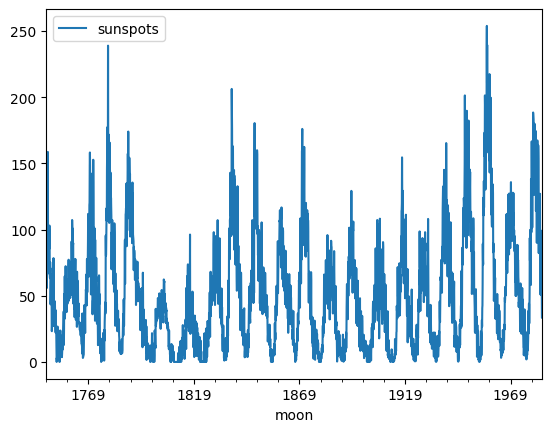

In [54]:
df.plot()

<AxesSubplot:xlabel='moon'>

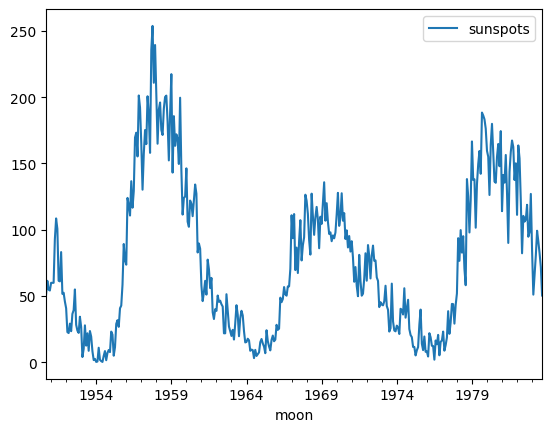

In [55]:
df.loc['1950-09-01':'1983-09-01'].plot()

In [56]:
date = df.index[3]

In [58]:
date

Timestamp('1749-04-01 00:00:00')

In [59]:
date.year

1749

In [60]:
pd.Timestamp(0)

Timestamp('1970-01-01 00:00:00')

In [62]:
pd.Timestamp('2022-01-01 00:00:00').week

52

In [68]:
pd.Timestamp('2022-08-24').weekofyear

34

In [63]:
pd.Timestamp.now()

Timestamp('2022-08-24 20:35:18.141971')

In [64]:
from dateutil.relativedelta import relativedelta

In [65]:
pd.Timestamp(0) + relativedelta(years=40)  # от рождения Linux до теперь

Timestamp('2010-01-01 00:00:00')

In [66]:
pd.Timedelta(3, unit='h')

Timedelta('0 days 03:00:00')

In [71]:
pd.Timestamp(year=1983, month=10, day=10, hour=12, minute=10, second=10)

Timestamp('1983-10-10 12:10:10')

In [72]:
tf['time'] = range(0,90000,10000)

In [73]:
tf

,n,letter,time
a,0,а,0
b,1,б,10000
c,2,в,20000
d,3,г,30000
e,4,д,40000
f,5,е,50000
g,7,ё,60000
h,8,ж,70000
i,9,з,80000


In [74]:
tf.dtypes

n          int64
letter    object
time       int64
dtype: object

In [76]:
tf['time_ms'] = pd.to_datetime(tf['time'], unit='us')

In [77]:
tf

,n,letter,time,time_ms
a,0,а,0,1970-01-01 00:00:00.000
b,1,б,10000,1970-01-01 00:00:00.010
c,2,в,20000,1970-01-01 00:00:00.020
d,3,г,30000,1970-01-01 00:00:00.030
e,4,д,40000,1970-01-01 00:00:00.040
f,5,е,50000,1970-01-01 00:00:00.050
g,7,ё,60000,1970-01-01 00:00:00.060
h,8,ж,70000,1970-01-01 00:00:00.070
i,9,з,80000,1970-01-01 00:00:00.080


In [79]:
now = pd.Timestamp.now()
now + tf['time'].apply(lambda x: pd.Timedelta(x, unit='us'))

a   2022-08-24 20:51:07.033184
b   2022-08-24 20:51:07.043184
c   2022-08-24 20:51:07.053184
d   2022-08-24 20:51:07.063184
e   2022-08-24 20:51:07.073184
f   2022-08-24 20:51:07.083184
g   2022-08-24 20:51:07.093184
h   2022-08-24 20:51:07.103184
i   2022-08-24 20:51:07.113184
Name: time, dtype: datetime64[ns]

In [81]:
year = pd.Period('2022')

In [82]:
year

Period('2022', 'A-DEC')

In [84]:
year.start_time

Timestamp('2022-01-01 00:00:00')

In [85]:
year.end_time

Timestamp('2022-12-31 23:59:59.999999999')

In [86]:
day = pd.Period('2022-01', freq='D')

In [93]:
day

Period('2022-01-01', 'D')

In [87]:
day.start_time, day.end_time

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-01-01 23:59:59.999999999'))

In [88]:
week = pd.Period('2022-01', freq='W')

In [92]:
week

Period('2021-12-27/2022-01-02', 'W-SUN')

In [89]:
week.start_time, week.end_time

(Timestamp('2021-12-27 00:00:00'), Timestamp('2022-01-02 23:59:59.999999999'))

In [90]:
hour = pd.Period('2022-01', freq='H')

In [91]:
hour

Period('2022-01-01 00:00', 'H')

In [94]:
hour + 3

Period('2022-01-01 03:00', 'H')

In [95]:
week = pd.date_range('2022-1-1', periods=7)

In [96]:
week

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')

In [100]:
year = pd.date_range('2022-1-1', periods=365) # сгенерировать все дни в этом году

In [98]:
year

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [99]:
year[-1]

Timestamp('2022-12-31 00:00:00', freq='D')

In [101]:
df[df.index.month ==8]    #узнать все августы года в df

,sunspots
moon,
1749-08-01,66.3
1750-08-01,103.0
1751-08-01,59.8
1752-08-01,29.3
1753-08-01,39.0
...,...
1979-08-01,142.2
1980-08-01,135.4
1981-08-01,158.7


In [102]:
df.resample('M')['sunspots'].mean()  #среднее количество пятен за каждый месяц

moon
1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
              ... 
1983-08-31    71.8
1983-09-30    50.3
1983-10-31    55.8
1983-11-30    33.3
1983-12-31    33.4
Freq: M, Name: sunspots, Length: 2820, dtype: float64

In [103]:
df.resample('Y')['sunspots'].mean()  #среднее количество пятен в году

moon
1749-12-31     80.925000
1750-12-31     83.391667
1751-12-31     47.658333
1752-12-31     47.800000
1753-12-31     30.691667
                 ...    
1979-12-31    155.275000
1980-12-31    154.650000
1981-12-31    140.375000
1982-12-31    116.291667
1983-12-31     66.633333
Freq: A-DEC, Name: sunspots, Length: 235, dtype: float64

<AxesSubplot:xlabel='moon'>

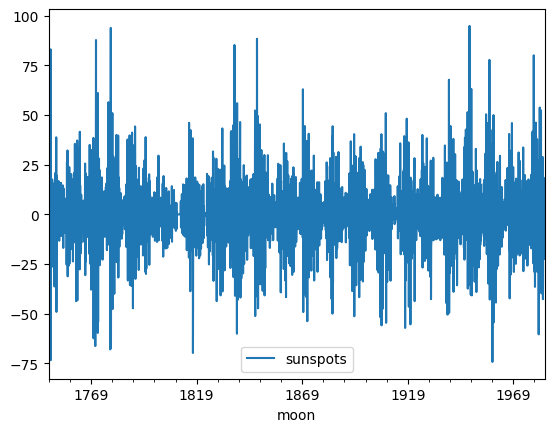

In [104]:
df.diff(1).plot()

In [105]:
df.rolling(12).mean()  # среднее кол-во пятен по месяцу

,sunspots
moon,
1749-01-01,NaN
1749-02-01,NaN
1749-03-01,NaN
1749-04-01,NaN
1749-05-01,NaN
...,...
1983-08-01,88.783333
1983-09-01,83.075000
1983-10-01,79.833333


<AxesSubplot:xlabel='moon'>

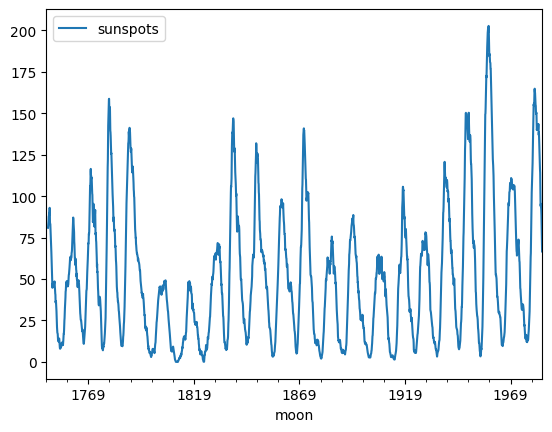

In [106]:
df.rolling(12).mean().plot()

<AxesSubplot:xlabel='moon'>

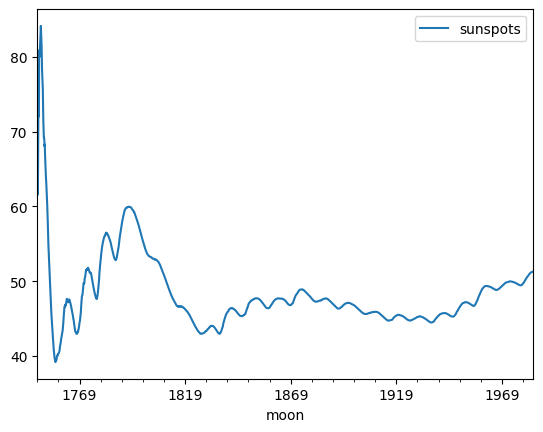

In [107]:
df.expanding(3).mean().plot() # последняя точка будет средняя по всему ряду

In [110]:
!pip install statsmodels

  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


You should consider upgrading via the 'd:\anna\repos\class_projects\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [112]:
result = seasonal_decompose(df['sunspots'], model='additive', period=12*11)   # period периодичность можно установить анализом Фурье

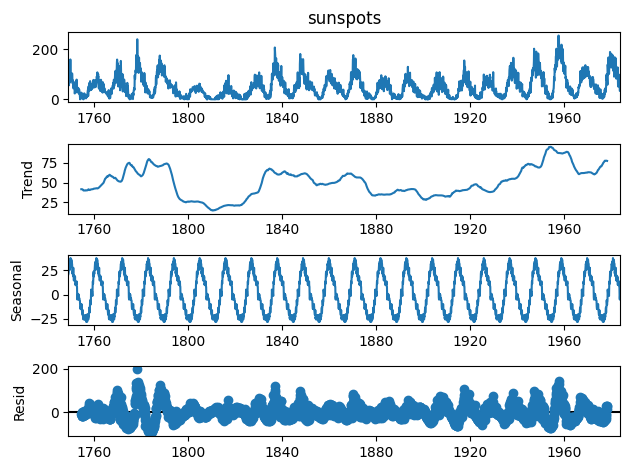

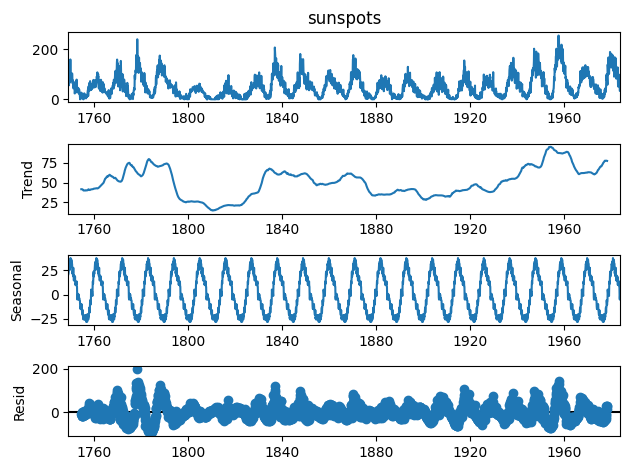

In [117]:
result.plot()

In [113]:
result = seasonal_decompose(df['sunspots'], model='multiplicative', period=12*11)

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [114]:
result.resid.std()

33.60006020559762

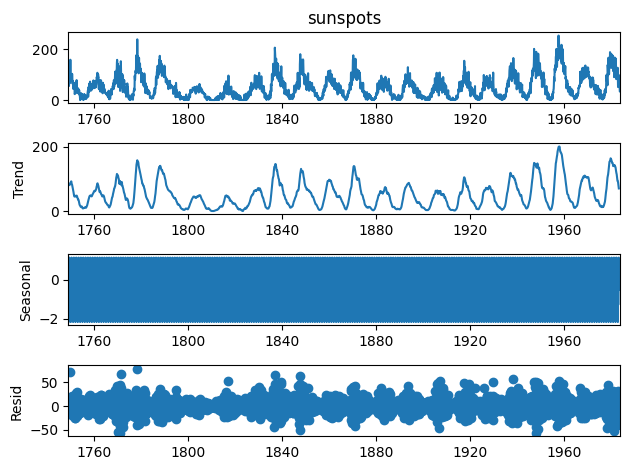

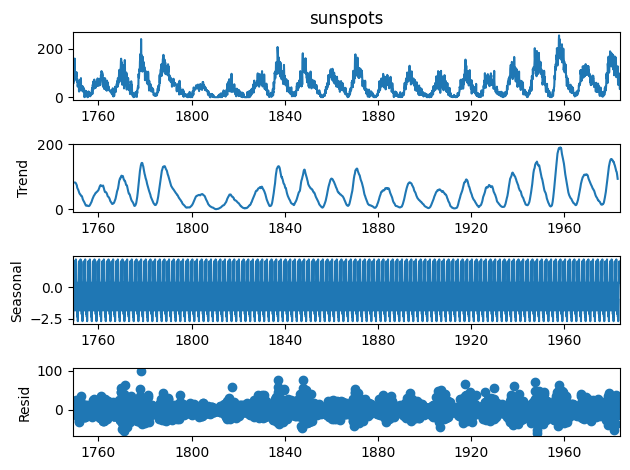

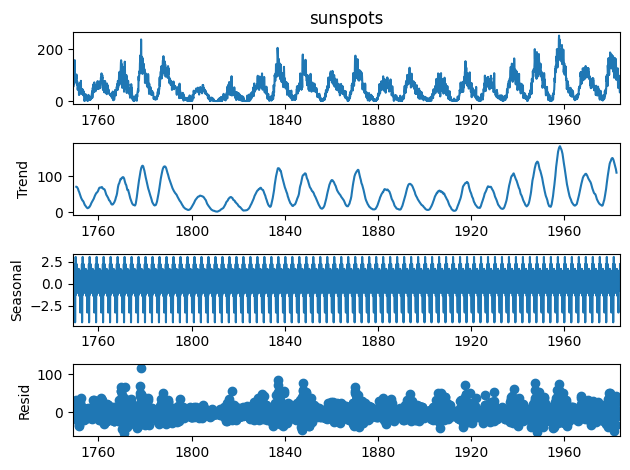

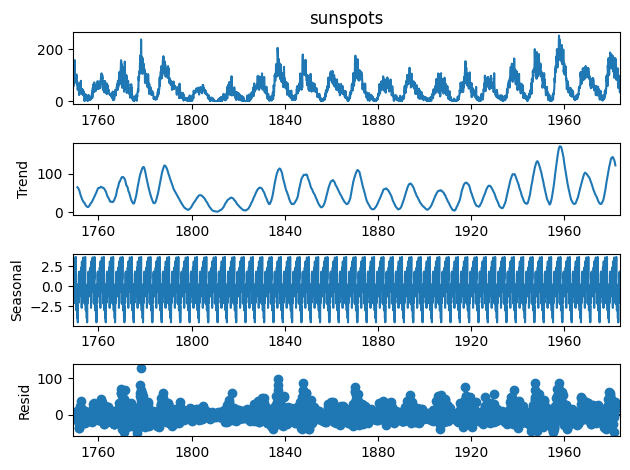

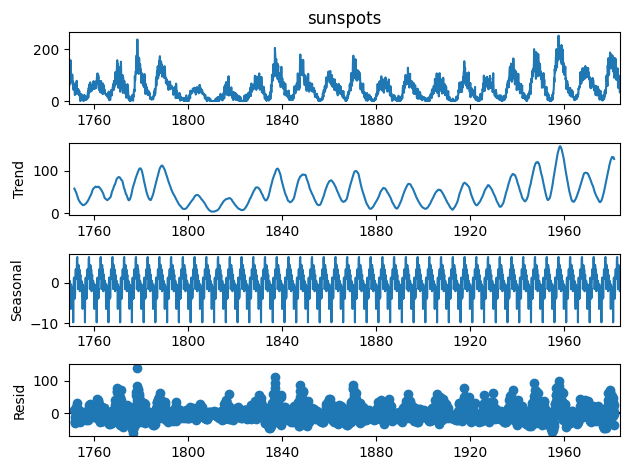

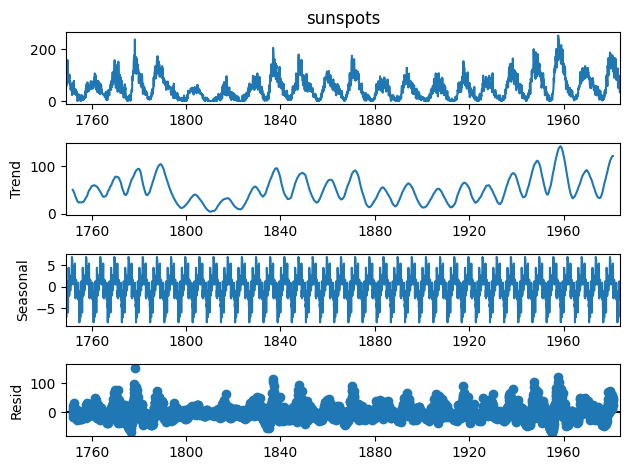

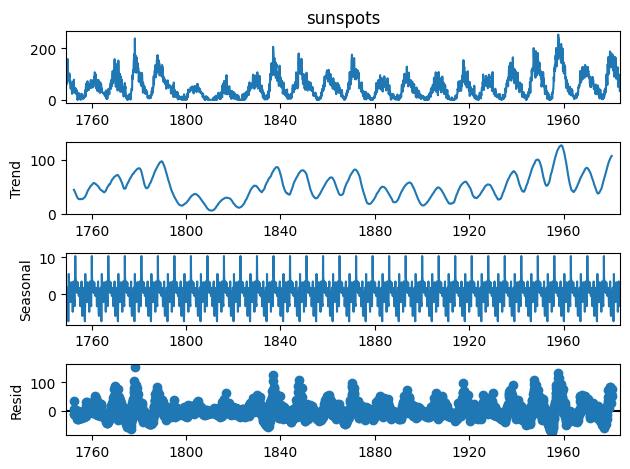

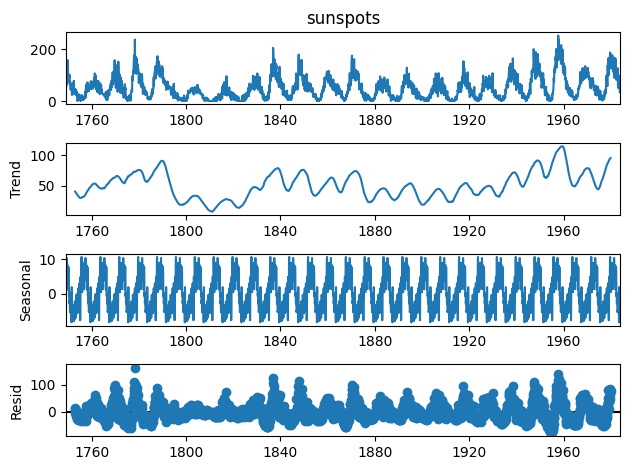

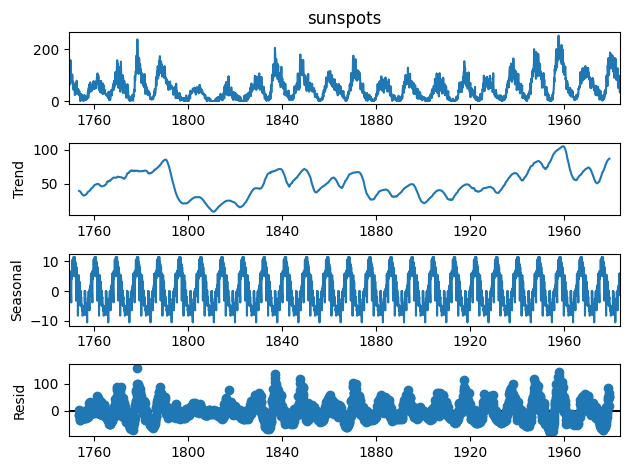

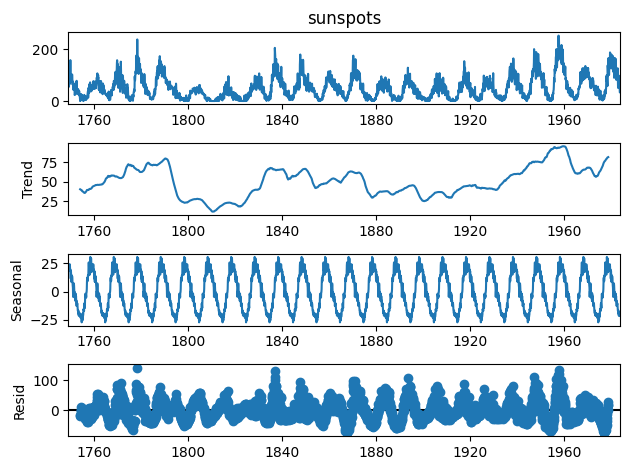

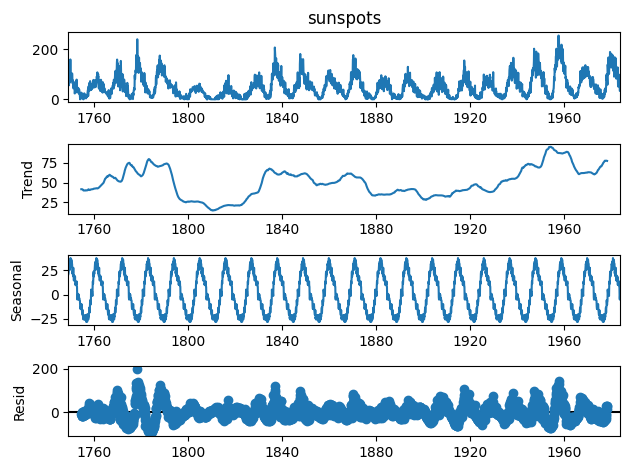

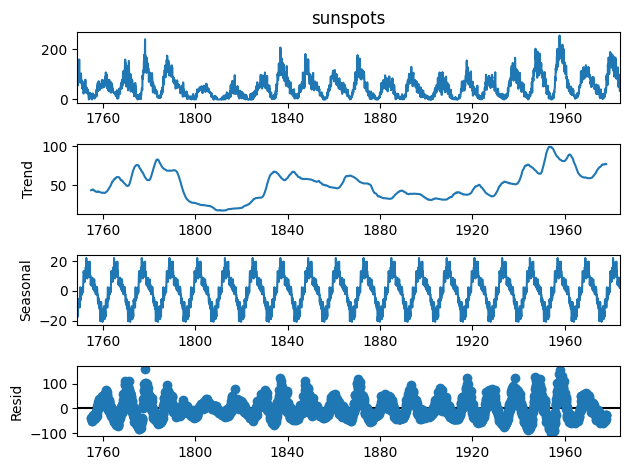

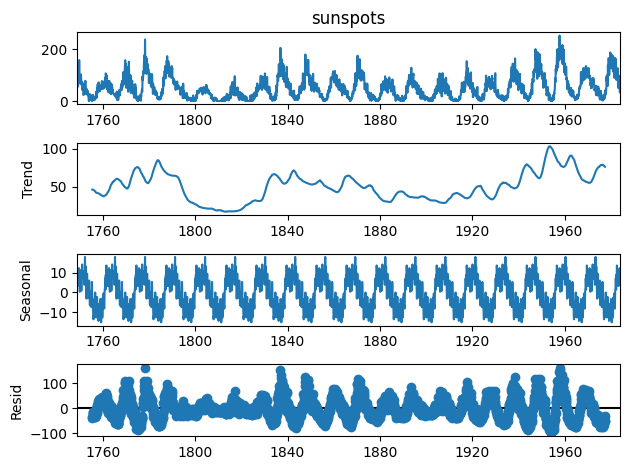

In [121]:
s = []
for p in range(1,14,1):
    results = seasonal_decompose(df['sunspots'], model='additive', period=12*p)
    results.plot()
    s.append(results.resid.std())

<AxesSubplot:>

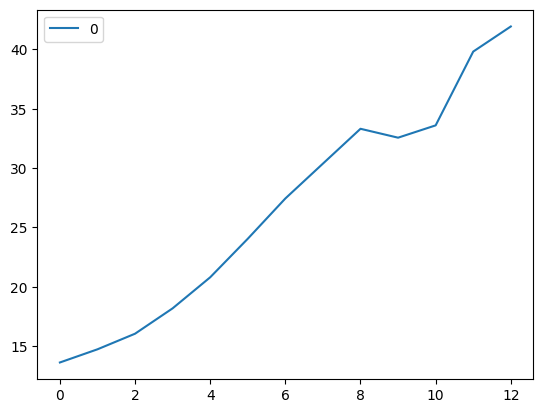

In [122]:
pd.DataFrame(s).plot()

In [123]:
results.resid

moon
1749-01-01   NaN
1749-02-01   NaN
1749-03-01   NaN
1749-04-01   NaN
1749-05-01   NaN
              ..
1983-08-01   NaN
1983-09-01   NaN
1983-10-01   NaN
1983-11-01   NaN
1983-12-01   NaN
Name: resid, Length: 2820, dtype: float64

In [134]:
results.trend

moon
1749-01-01   NaN
1749-02-01   NaN
1749-03-01   NaN
1749-04-01   NaN
1749-05-01   NaN
              ..
1983-08-01   NaN
1983-09-01   NaN
1983-10-01   NaN
1983-11-01   NaN
1983-12-01   NaN
Name: trend, Length: 2820, dtype: float64

In [125]:
results.observed  # изначальный ряд

moon
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: sunspots, Length: 2820, dtype: float64

In [126]:
results.weights

moon
1749-01-01    1.0
1749-02-01    1.0
1749-03-01    1.0
1749-04-01    1.0
1749-05-01    1.0
             ... 
1983-08-01    1.0
1983-09-01    1.0
1983-10-01    1.0
1983-11-01    1.0
1983-12-01    1.0
Name: weights, Length: 2820, dtype: float64

In [131]:
result = seasonal_decompose(df['sunspots'], model='additive', period=12*10)

<AxesSubplot:>

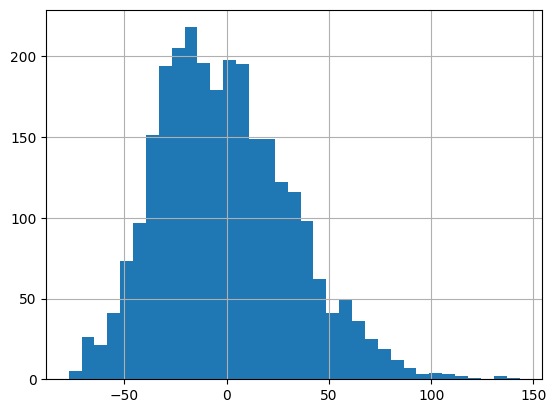

In [132]:
result.resid.hist(bins='auto')

{'whiskers': [<matplotlib.lines.Line2D at 0x20ec537d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ec537d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ec2adcfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ec537de20>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ec5388130>],
 'means': []}

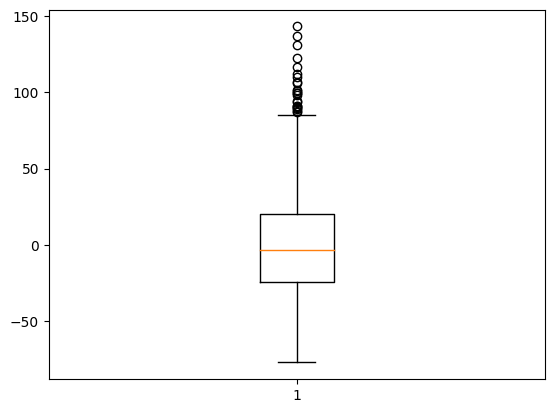

In [135]:
plt.boxplot(result.resid.dropna())

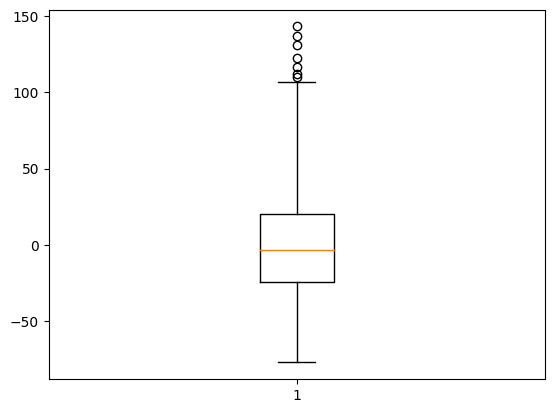

In [137]:
box = plt.boxplot(result.resid.dropna(), whis=2)

In [138]:
outliers = box['fliers'][0].get_data()[1]  # вычисляем значения аутлайеров за усами

In [143]:
anomaly = df.loc[result.resid.isin(outliers), :]  # извлекаем значения аутлайеров
anomaly

,sunspots
moon,
1778-05-01,238.9
1836-12-01,206.2
1837-01-01,188.0
1947-05-01,201.3
1957-09-01,235.8
1957-10-01,253.8
1957-12-01,239.4


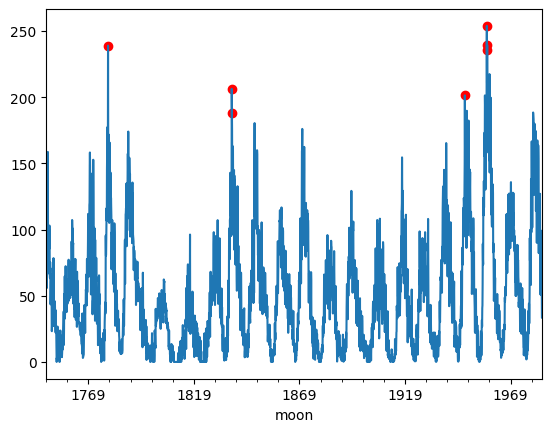

In [144]:
df.sunspots.plot()
plt.scatter(anomaly.index, anomaly.sunspots, color='red')

In [145]:
df['time'] = df.index

In [148]:
df.time.diff(1).value_counts()   #Встречаемость промежутков по времени - дырки, здесь ряд без дырок

31 days    1644
30 days     940
28 days     179
29 days      56
Name: time, dtype: int64